# **Project 1: Stock Market Prediction**

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('infolimpioavanzadoTarget.csv')

# Analyzing the dataset

In [3]:
dataset.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [4]:
dataset.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,267.000000,267.000000,267.000000,267.000000,267.000000,2.670000e+02,237.000000,237.000000,226.000000,226.000000,...,238.000000,238.000000,235.000000,238.000000,235.000000,235.000000,266.000000,261.000000,261.000000,266.000000
mean,15.796648,16.116951,15.468506,15.785749,15.785749,1.610876e+05,50.101361,50.038441,50.921963,50.154602,...,17.810387,52.578993,52.685789,52.578993,52.685789,0.372617,1.461155,-0.040670,0.022548,0.195489
std,3.408034,3.454040,3.368421,3.419076,3.419076,2.591158e+05,13.239282,5.989617,8.835046,4.455605,...,2.510435,30.333677,28.285706,30.333677,28.285706,11.579736,2.230095,0.960030,6.064140,0.397324
min,4.500000,4.610000,4.050000,4.450000,4.450000,1.950000e+04,7.260120,40.924816,35.631228,44.770056,...,6.150000,1.234518,5.976293,1.234518,5.976293,-36.009395,0.296808,-2.700001,-14.285715,0.000000
25%,14.490000,14.780000,14.205000,14.480000,14.480000,7.080000e+04,41.677241,47.041334,44.338290,48.263751,...,16.090750,24.713864,26.021173,24.713864,26.021173,-6.235636,0.682701,-0.670000,-4.138357,0.000000
50%,15.740000,16.030001,15.530000,15.720000,15.720000,1.099000e+05,50.013504,48.487428,49.294634,49.014110,...,16.910000,52.470798,54.113988,52.470798,54.113988,-0.154580,1.006471,-0.060000,-0.429188,0.000000
75%,17.895000,18.455000,17.675000,18.025001,18.025001,1.646500e+05,56.881209,50.702080,56.943019,50.530850,...,20.660000,82.832126,80.809857,82.832126,80.809857,8.487945,1.572045,0.600000,3.882486,0.000000
max,21.730000,21.760000,21.059999,21.520000,21.520000,3.018200e+06,85.704345,87.874402,76.901190,83.023385,...,21.760000,98.951208,95.701085,98.951208,95.701085,34.825371,26.041415,2.340000,16.571883,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 1285 entries, date to TARGET
dtypes: float64(1281), int64(2), object(2)
memory usage: 2.6+ MB


In [6]:
dataset.nunique()

date                251
open                216
high                219
low                 233
close               218
                   ... 
stochastic-kd-15    235
volumenrelativo     248
diff                236
INCREMENTO          261
TARGET                2
Length: 1285, dtype: int64

In [7]:
dataset.isnull().sum()

date                 0
open                 0
high                 0
low                  0
close                0
                    ..
stochastic-kd-15    32
volumenrelativo      1
diff                 6
INCREMENTO           6
TARGET               1
Length: 1285, dtype: int64

In [8]:
cat_cols=dataset.select_dtypes(include=['object']).columns
num_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date', 'ticker'], dtype='object')
Numerical Variables:
['open', 'high', 'low', 'close', 'adjclose', 'volume', 'RSIadjclose15', 'RSIvolume15', 'RSIadjclose25', 'RSIvolume25', 'RSIadjclose50', 'RSIvolume50', 'MACDadjclose15', 'MACDvolume15', 'MACDadjclose25', 'MACDvolume25', 'MACDadjclose50', 'MACDvolume50', 'MACDsig-adjclose-15', 'MACDdif-adjclose-15-0', 'MACDdif-adjclose-15-1', 'MACDdif-adjclose-15-2', 'MACDdif-adjclose-15-3', 'MACDsig-volume-15', 'MACDdif-volume-15-0', 'MACDdif-volume-15-1', 'MACDdif-volume-15-2', 'MACDdif-volume-15-3', 'MACDsig-adjclose-25', 'MACDdif-adjclose-25-0', 'MACDdif-adjclose-25-1', 'MACDdif-adjclose-25-2', 'MACDdif-adjclose-25-3', 'MACDsig-volume-25', 'MACDdif-volume-25-0', 'MACDdif-volume-25-1', 'MACDdif-volume-25-2', 'MACDdif-volume-25-3', 'MACDsig-adjclose-50', 'MACDdif-adjclose-50-0', 'MACDdif-adjclose-50-1', 'MACDdif-adjclose-50-2', 'MACDdif-adjclose-50-3', 'MACDsig-volume-50', 'MACDdif-volume-50-0', 'MACDdif-volume-50-1',

# Transforming dataset

In [9]:
dataset = dataset.drop(['date'] , axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Columns: 1284 entries, open to TARGET
dtypes: float64(1281), int64(2), object(1)
memory usage: 2.6+ MB


In [10]:
def swap_columns(dset, col1, col2):
    col_list = list(dset.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    dset = dset[col_list]
    return dset

In [11]:
dataset = swap_columns(dataset, 'adjclose', 'volume')

In [12]:
dataset.describe()

,open,high,low,close,volume,adjclose,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,267.000000,267.000000,267.000000,267.000000,2.670000e+02,267.000000,237.000000,237.000000,226.000000,226.000000,...,238.000000,238.000000,235.000000,238.000000,235.000000,235.000000,266.000000,261.000000,261.000000,266.000000
mean,15.796648,16.116951,15.468506,15.785749,1.610876e+05,15.785749,50.101361,50.038441,50.921963,50.154602,...,17.810387,52.578993,52.685789,52.578993,52.685789,0.372617,1.461155,-0.040670,0.022548,0.195489
std,3.408034,3.454040,3.368421,3.419076,2.591158e+05,3.419076,13.239282,5.989617,8.835046,4.455605,...,2.510435,30.333677,28.285706,30.333677,28.285706,11.579736,2.230095,0.960030,6.064140,0.397324
min,4.500000,4.610000,4.050000,4.450000,1.950000e+04,4.450000,7.260120,40.924816,35.631228,44.770056,...,6.150000,1.234518,5.976293,1.234518,5.976293,-36.009395,0.296808,-2.700001,-14.285715,0.000000
25%,14.490000,14.780000,14.205000,14.480000,7.080000e+04,14.480000,41.677241,47.041334,44.338290,48.263751,...,16.090750,24.713864,26.021173,24.713864,26.021173,-6.235636,0.682701,-0.670000,-4.138357,0.000000
50%,15.740000,16.030001,15.530000,15.720000,1.099000e+05,15.720000,50.013504,48.487428,49.294634,49.014110,...,16.910000,52.470798,54.113988,52.470798,54.113988,-0.154580,1.006471,-0.060000,-0.429188,0.000000
75%,17.895000,18.455000,17.675000,18.025001,1.646500e+05,18.025001,56.881209,50.702080,56.943019,50.530850,...,20.660000,82.832126,80.809857,82.832126,80.809857,8.487945,1.572045,0.600000,3.882486,0.000000
max,21.730000,21.760000,21.059999,21.520000,3.018200e+06,21.520000,85.704345,87.874402,76.901190,83.023385,...,21.760000,98.951208,95.701085,98.951208,95.701085,34.825371,26.041415,2.340000,16.571883,1.000000


In [13]:
dataset = dataset[['open' , 'high' , 'low' , 'close' , 'volume' , 'adjclose']]
dataset.head()

,open,high,low,close,volume,adjclose
0,17.799999,18.219000,17.500000,17.760000,106600,17.760000
1,17.700001,18.309999,17.620001,17.660000,128700,17.660000
2,17.580000,17.799999,16.910000,16.950001,103100,16.950001
3,16.650000,16.879999,16.139999,16.170000,173600,16.170000
4,16.219999,16.290001,15.630000,15.710000,137800,15.710000


# Analyzing Skewness

open
Skew : -1.38


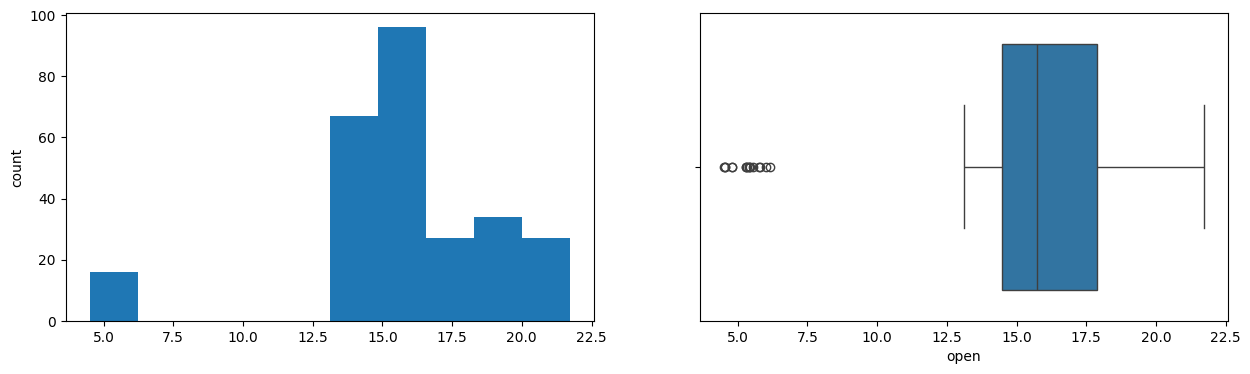

high
Skew : -1.41


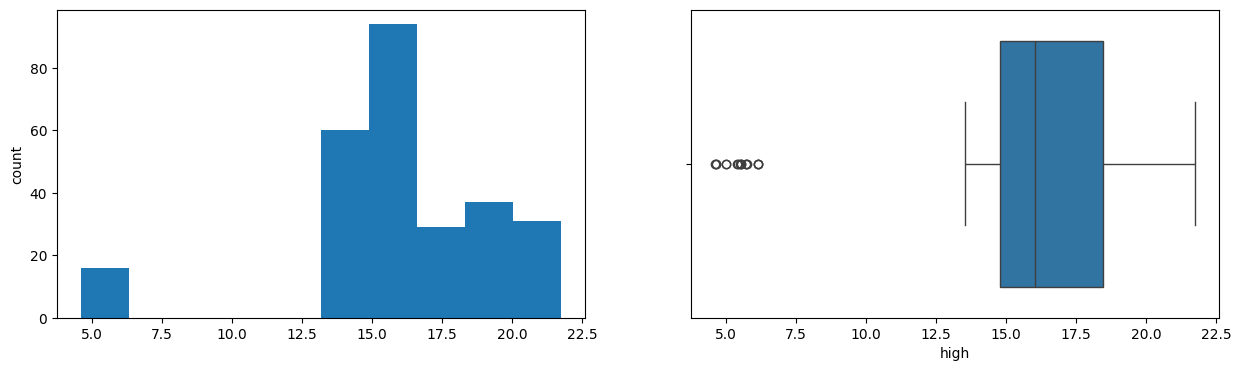

low
Skew : -1.42


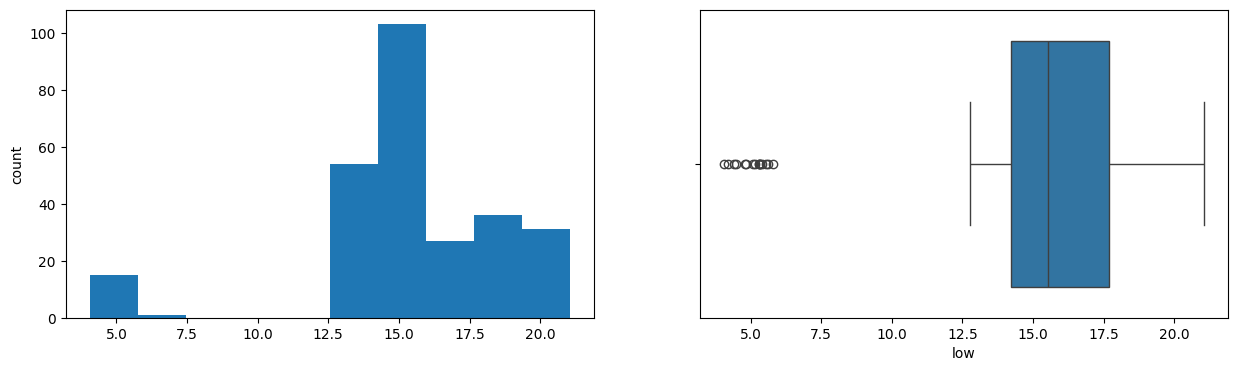

close
Skew : -1.41


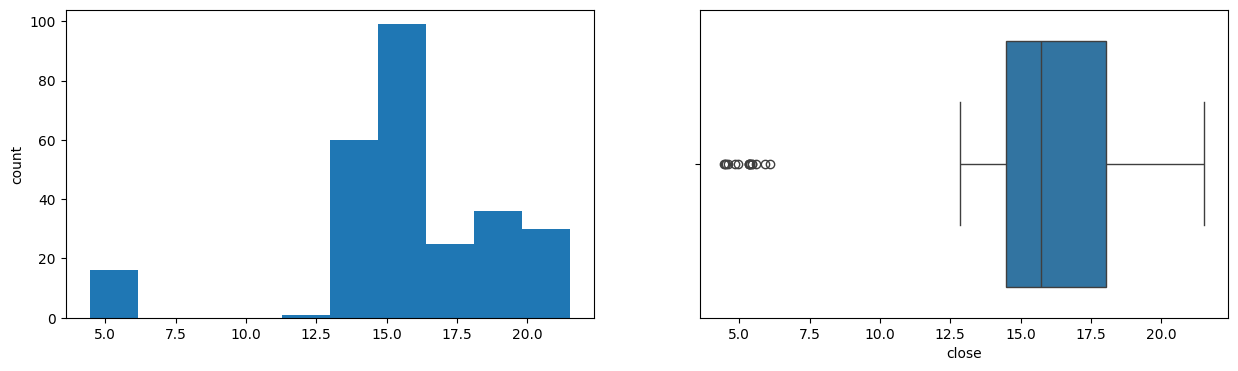

adjclose
Skew : -1.41


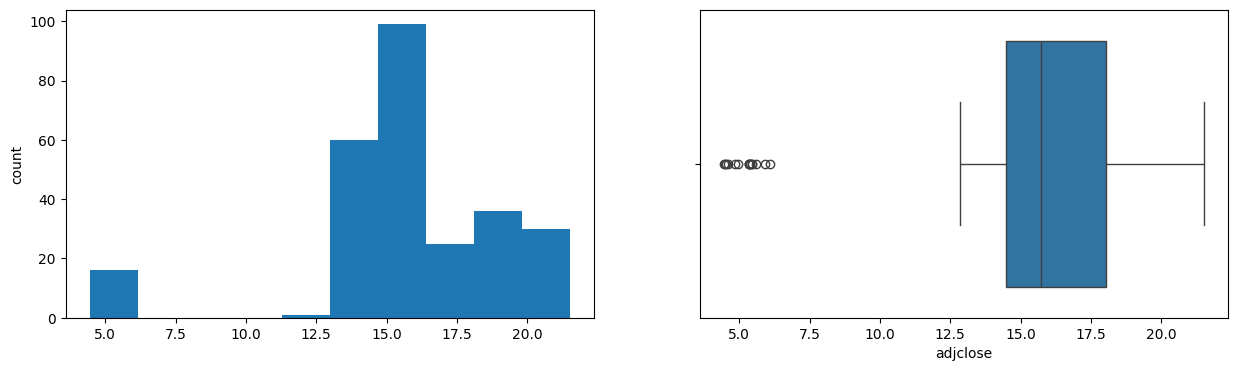

volume
Skew : 8.07


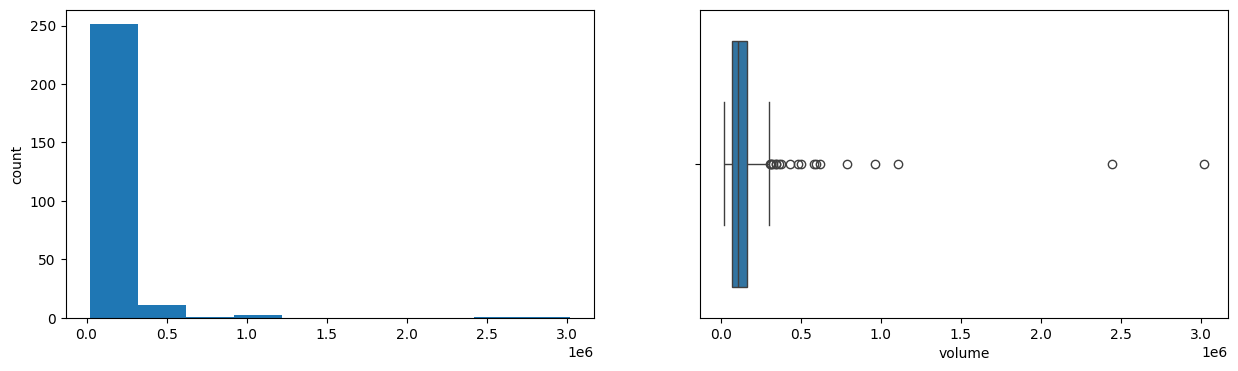

RSIadjclose15


KeyError: 'RSIadjclose15'

In [14]:
for col in num_cols:
    print(col)
    print('Skew :', round(dataset[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    dataset[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataset[col])
    plt.show()

# Analyzing relationship between different parameters

<Figure size 1300x1700 with 0 Axes>

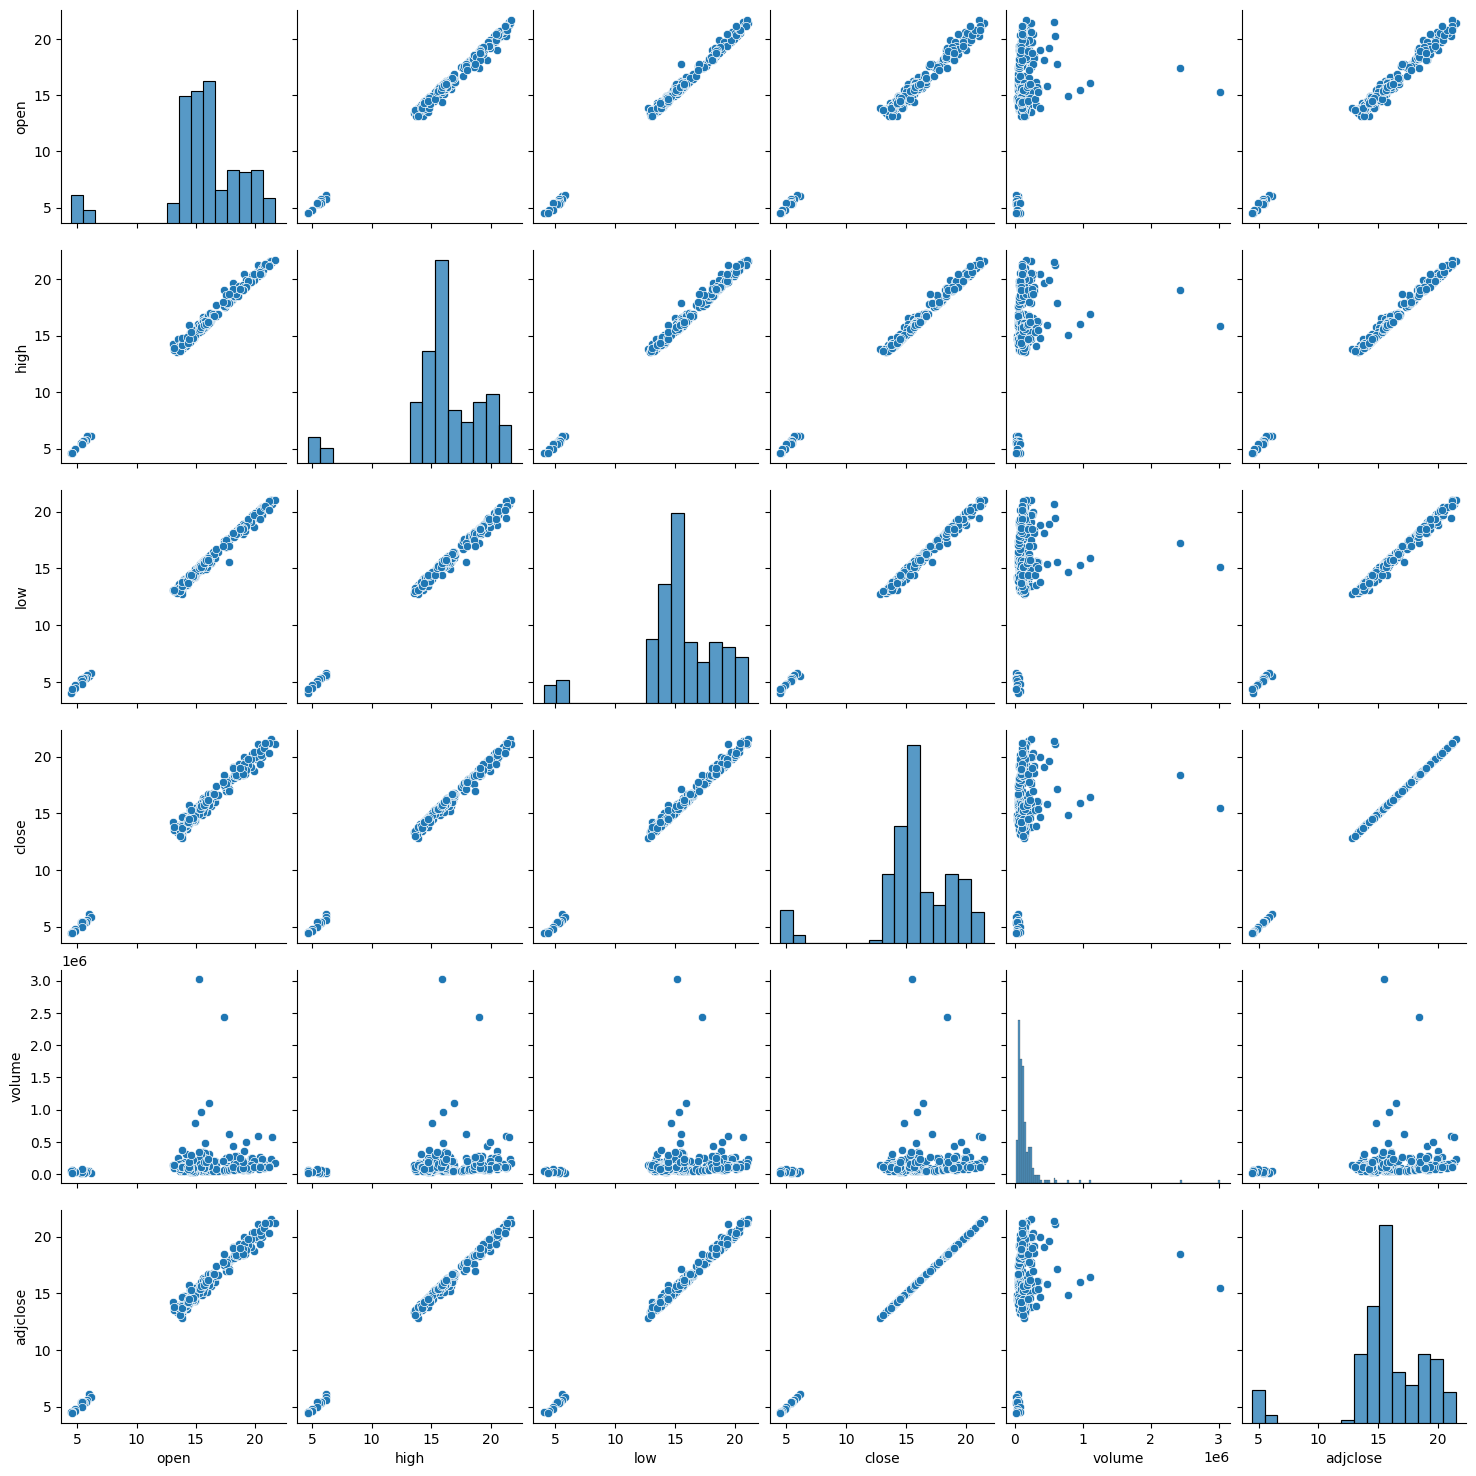

In [15]:
plt.figure(figsize=(13,17))
sns.pairplot(data=dataset)
plt.show()

# Heat Map to analyze Correlation

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix.

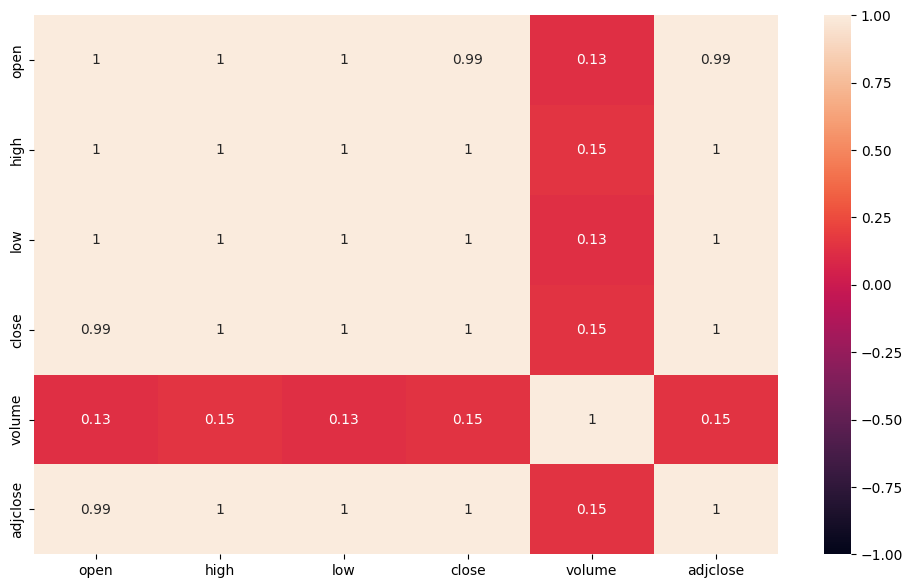

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(dataset.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Transforming the dataset

In [17]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [18]:
print(X)

[[1.77999992e+01 1.82189999e+01 1.75000000e+01 1.77600002e+01
  1.06600000e+05]
 [1.77000008e+01 1.83099995e+01 1.76200008e+01 1.76599998e+01
  1.28700000e+05]
 [1.75799999e+01 1.77999992e+01 1.69099998e+01 1.69500008e+01
  1.03100000e+05]
 ...
 [4.55000019e+00 4.65000010e+00 4.20499992e+00 4.53999996e+00
  7.38400000e+04]
 [4.50000000e+00 4.61000013e+00 4.05000019e+00 4.50000000e+00
  5.27200000e+04]
 [4.55000019e+00 4.65000010e+00 4.40000010e+00 4.44999981e+00
  2.07000000e+04]]


In [19]:
print(Y)

[17.76000023 17.65999985 16.95000076 16.17000008 15.71000004 15.85999966
 16.28000069 16.02000046 15.81000042 15.59000015 15.39999962 14.97999954
 14.90999985 14.40999985 14.40999985 14.22999954 14.18000031 13.64999962
 13.22999954 14.22999954 14.38000011 14.06000042 13.48999977 13.57999992
 14.05000019 14.73999977 14.97999954 15.27000046 15.06000042 14.81999969
 15.5        15.77000046 15.11999989 15.21000004 15.68000031 15.36999989
 15.51000023 15.82999992 15.65999985 15.55000019 16.25       15.65999985
 15.52000046 15.64999962 15.52999973 15.60999966 15.44999981 14.85000038
 14.35000038 15.22000027 15.55000019 16.02000046 16.47999954 16.38999939
 16.03000069 15.63000011 16.37000084 16.29000092 15.85999966 15.92000008
 15.64000034 15.72000027 16.25       16.29999924 15.61999989 15.55000019
 15.94999981 15.52999973 15.52000046 15.72000027 15.77000046 15.75
 16.03000069 16.72999954 16.43000031 16.03000069 15.14999962 15.11999989
 14.44999981 14.47999954 14.81999969 14.47999954 14.55000

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train)

[[1.40900002e+01 1.46300001e+01 1.40900002e+01 1.46099997e+01
  9.74000000e+04]
 [1.99500008e+01 1.99500008e+01 1.86399994e+01 1.87299995e+01
  2.10600000e+05]
 [1.56899996e+01 1.59399996e+01 1.54499998e+01 1.57600002e+01
  1.87200000e+05]
 ...
 [1.38299999e+01 1.41599998e+01 1.38299999e+01 1.38800001e+01
  1.06500000e+05]
 [1.54899998e+01 1.57600002e+01 1.48299999e+01 1.48500004e+01
  7.51000000e+04]
 [2.17299995e+01 2.17600002e+01 2.09799995e+01 2.11599998e+01
  1.74500000e+05]]


In [22]:
print(Y_train)

[14.60999966 18.72999954 15.76000023 15.52999973 13.92000008 16.43000031
 18.32999992 19.07999992 14.52000046 21.18000031 19.35000038 13.35999966
 20.         14.03999996 13.22999954 20.44000053 20.88999939 13.52000046
 15.75       18.11000061 19.04000092  5.3499999  14.35999966 15.21000004
 14.17000008 18.43000031 16.82999992 14.52000046 14.06000042 15.19999981
 14.40999985 14.18000031 17.65999985 16.03000069 13.63000011 15.97999954
 14.22999954 15.85000038 15.71000004 16.12000084 15.72000027 15.52999973
 16.47999954 15.94999981 14.97999954 19.77000046 19.05999947 13.75
 14.84000015 16.25       14.40999985 16.71999931 18.35000038 16.17000008
 14.23999977 14.05000019 15.5         5.44999981 21.12999916 15.64000034
 16.37000084 15.10999966 20.         15.44999981 14.22999954 18.5
 15.81000042 16.03000069 17.         14.81999969 16.02000046 16.95000076
 18.54000092 14.39000034 17.75       14.06000042 15.39999962 19.82999992
  5.9000001  15.65999985 14.40999985 15.55000019 15.48999977 14.

In [23]:
print(X_test)

[[2.00100002e+01 2.03199997e+01 1.98999996e+01 1.99899998e+01
  1.34300000e+05]
 [1.60000000e+01 1.67600002e+01 1.60000000e+01 1.67299995e+01
  5.52000000e+04]
 [1.87299995e+01 1.91329994e+01 1.84500008e+01 1.90000000e+01
  2.60000000e+05]
 [1.60000000e+01 1.61700001e+01 1.56800003e+01 1.58100004e+01
  6.91000000e+04]
 [5.40000010e+00 5.42999983e+00 4.84999990e+00 4.94999981e+00
  8.25600000e+04]
 [1.56700001e+01 1.57349997e+01 1.53100004e+01 1.54099998e+01
  1.01100000e+05]
 [1.38100004e+01 1.38100004e+01 1.34099998e+01 1.35900002e+01
  5.78000000e+04]
 [1.38199997e+01 1.39250002e+01 1.35200005e+01 1.37700005e+01
  8.57000000e+04]
 [1.93999996e+01 1.98799992e+01 1.93250008e+01 1.97999992e+01
  8.37000000e+04]
 [1.57399998e+01 1.60499992e+01 1.54300003e+01 1.56099997e+01
  7.25000000e+04]
 [1.60000000e+01 1.62399998e+01 1.57700005e+01 1.62199993e+01
  2.32000000e+05]
 [1.59200001e+01 1.61700001e+01 1.57500000e+01 1.59200001e+01
  4.69000000e+04]
 [1.92199993e+01 1.99699993e+01 1.894000

In [24]:
print(Y_test)

[19.98999977 16.72999954 19.         15.81000042  4.94999981 15.40999985
 13.59000015 13.77000046 19.79999924 15.60999966 16.21999931 15.92000008
 19.57999992 20.17000008 20.35000038 14.22999954 18.02000046 19.90999985
 20.04000092 15.63000011 19.22999954 20.54000092 15.96000004 16.02000046
 16.69000053 14.48999977 14.02999973 16.04000092 20.32999992 15.38000011
 16.55999947 15.80000019 15.40999985 14.10999966 15.27000046 14.69999981
 19.38999939 15.82999992 15.31999969 14.38000011 18.45000076 15.78999996
 15.14999962  5.3499999  18.37000084 15.85999966 13.48999977 19.11000061
 15.61999989 14.90999985 13.94999981 19.32999992 16.29999924 15.68999958]


# Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
print(X_train)

[[-0.45581305 -0.38841456 -0.36460546 -0.30271256 -0.23999248]
 [ 1.22835385  1.11889512  0.9579685   0.87645304  0.16367648]
 [ 0.00402753 -0.01725391  0.03071332  0.02642364  0.08023255]
 ...
 [-0.53053723 -0.5215792  -0.44018119 -0.51164227 -0.20754206]
 [-0.05345251 -0.06825292 -0.14950555 -0.2340231  -0.31951384]
 [ 1.73992633  1.63172019  1.63814956  1.57193189  0.0349446 ]]


In [27]:
print(X_test)

[[ 1.24559773e+00  1.22372649e+00  1.32421988e+00  1.23707173e+00
  -1.08407807e-01]
 [ 9.31217972e-02  2.15075928e-01  1.90584978e-01  3.04042538e-01
  -3.90476842e-01]
 [ 8.77724936e-01  8.87415066e-01  9.02740530e-01  9.53728592e-01
   3.39835905e-01]
 [ 9.31217972e-02  4.79118623e-02  9.75688602e-02  4.07339576e-02
  -3.40909717e-01]
 [-2.95332311e+00 -2.99504008e+00 -3.05044849e+00 -3.06745525e+00
  -2.92911623e-01]
 [-1.72033444e-03 -7.53363073e-02 -9.98109527e-03 -7.37483070e-02
  -2.26798350e-01]
 [-5.36285101e-01 -6.20744132e-01 -5.62264987e-01 -5.94641778e-01
  -3.81205293e-01]
 [-5.33411305e-01 -5.88161379e-01 -5.30290489e-01 -5.43124746e-01
  -2.81714445e-01]
 [ 1.07028327e+00  1.09906165e+00  1.15708172e+00  1.18269257e+00
  -2.88846406e-01]
 [ 1.83976104e-02  1.39121623e-02  2.48999489e-02 -1.65073111e-02
  -3.28785384e-01]
 [ 9.31217972e-02  6.77447955e-02  1.23729713e-01  1.58077794e-01
   2.39988459e-01]
 [ 7.01297819e-02  4.79118623e-02  1.17916067e-01  7.22164371e-02

## Training XGBoost on the Training set

In [28]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Predicting the model on Test Set

In [29]:
Y_pred = regressor.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred) , 1) , Y_test.reshape(len(Y_test) , 1)) , 1))

[[19.87103653 19.98999977]
 [16.68282127 16.72999954]
 [19.08222389 19.        ]
 [15.80039692 15.81000042]
 [ 5.3486495   4.94999981]
 [15.40499687 15.40999985]
 [13.61942196 13.59000015]
 [13.73207378 13.77000046]
 [19.84555435 19.79999924]
 [15.58632755 15.60999966]
 [16.17171669 16.21999931]
 [15.92184067 15.92000008]
 [19.46818352 19.57999992]
 [20.17817688 20.17000008]
 [20.2597599  20.35000038]
 [14.32963943 14.22999954]
 [18.05739975 18.02000046]
 [19.87045288 19.90999985]
 [19.88876343 20.04000092]
 [15.57767105 15.63000011]
 [19.07785606 19.22999954]
 [20.56196404 20.54000092]
 [15.99606895 15.96000004]
 [16.03101921 16.02000046]
 [16.83037567 16.69000053]
 [14.43993378 14.48999977]
 [13.90849876 14.02999973]
 [16.02414513 16.04000092]
 [20.221838   20.32999992]
 [15.37976933 15.38000011]
 [16.48564148 16.55999947]
 [15.78782558 15.80000019]
 [15.40347195 15.40999985]
 [14.15069675 14.10999966]
 [15.23159599 15.27000046]
 [14.60281658 14.69999981]
 [19.45450783 19.38999939]
 

In [30]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(Y_test , Y_pred))

0.004492530749401442
